In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree

In [2]:
df_raw = pd.read_csv("final_model_data.csv")

In [3]:
features= df_raw.columns.tolist()
print(features,end=",")

['Unnamed: 0', 'index', 'restatus', 'educ2003', 'monthdth', 'age', 'placdth', 'weekday', 'year', 'mandeath', 'ranum', 'racer5', 'hspanicr', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'Sex_F', 'Sex_M', 'marstat_D', 'marstat_M', 'marstat_S', 'marstat_W'],

In [4]:
Y = df_raw[['mandeath']]
X = df_raw[['restatus', 'educ2003', 'monthdth', 'age', 'placdth', 'weekday', 'year',
                      'ranum', 'racer5', 'hspanicr', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 
                      'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX',
                      'Sex_F', 'Sex_M', 'marstat_D', 'marstat_M', 'marstat_S', 'marstat_W']]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [6]:
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
DecisionTree.score(X_test, y_test, sample_weight=None)

0.9446527998153651

In [7]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98899,  5261],
       [ 6250, 97568]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

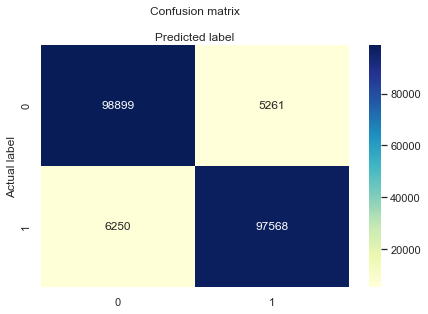

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test, sample_weight=None)

C:\Users\hukai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hukai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9528555904951486

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 97388,   6772],
       [  3033, 100785]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

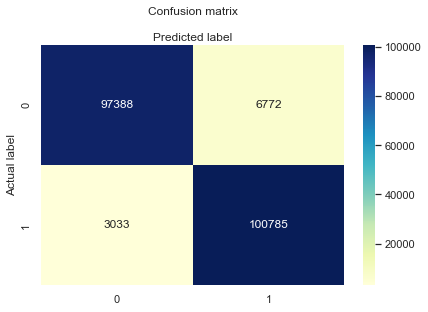

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

C:\Users\hukai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9183904066776294

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 90900,  13260],
       [  3713, 100105]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

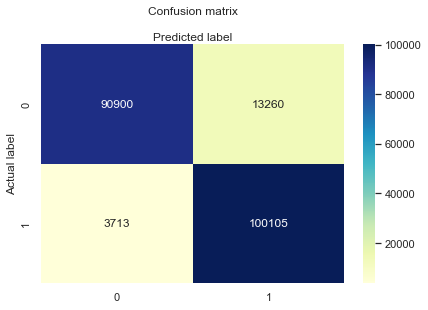

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
from sklearn.svm import SVC  
clf = SVC(kernel='poly') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

C:\Users\hukai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8136629835848023

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86288, 17872],
       [20882, 82936]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

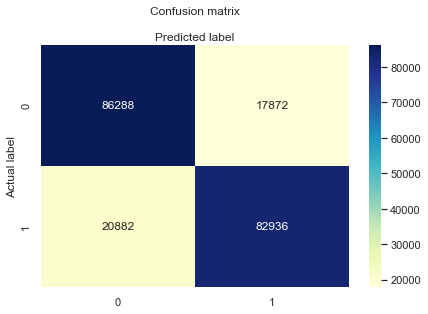

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
from sklearn.naive_bayes import MultinomialNB
muNB = MultinomialNB()
muNB.fit(X_train, y_train)
y_pred = muNB.predict(X_test)
muNB.score(X_test, y_test)

C:\Users\hukai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8742703555183722

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[93153, 11007],
       [15142, 88676]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

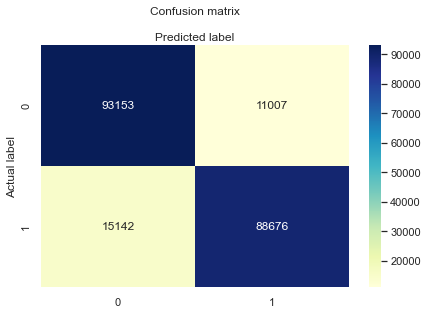

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
from sklearn.naive_bayes import ComplementNB
cmNB = ComplementNB()
cmNB.fit(X_train, y_train)
y_pred = cmNB.predict(X_test)
cmNB.score(X_test, y_test)

C:\Users\hukai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8742607391166374

In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[93155, 11005],
       [15146, 88672]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

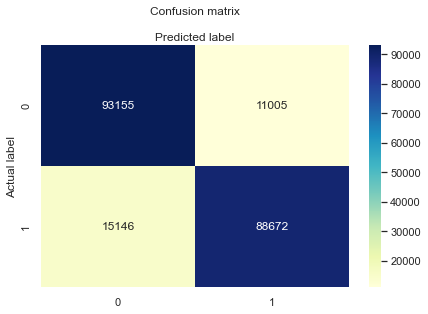

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')